# MTH793P - Coursework 6-2

This is a template notebook for the computational exercises of Coursework 6, part **2/2** of the module MTH793P, Advanced machine learning. 

In this part we will implement and explore PCA.

**<font color='red'>IMPORTANT NOTE:</font>**<br>
When using **svd** in this part, always pass the parameter: **<font color='red'>full_matrices=False</font>**.
This is important to speed up the computations.


In [1]:
### 
### Required imports
###

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from numpy.linalg import svd
from scipy import io

from numpy.testing import assert_almost_equal

%matplotlib inline

## PCA for dimension reduction
We will first demonstrate PCA on a 13-dimensional dataset, by loading wine dataset from sklearn, see info [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset). <br>
This dataset contains chemical analysis of N=178 different wines by three different cultivators.
<br>
The analysis contains the folowing measurements:
<dd class="field-odd"><ul class="simple">
<li><p>Alcohol</p></li>
<li><p>Malic acid</p></li>
<li><p>Ash</p></li>
<li><p>Alcalinity of ash</p></li>
<li><p>Magnesium</p></li>
<li><p>Total phenols</p></li>
<li><p>Flavanoids</p></li>
<li><p>Nonflavanoid phenols</p></li>
<li><p>Proanthocyanins</p></li>
<li><p>Colour intensity</p></li>
<li><p>Hue</p></li>
<li><p>OD280/OD315 of diluted wines</p></li>
<li><p>Proline</p></li>
</ul>
</dd>
</dl>

So overall, we have N=178 data points, lying in $\mathbb{R}^{D}$, with D=13. We stack all points together into a matrix **<font color='red'>X_wine</font>** $\in \mathbb{R}^{D\times N}$.<br>
We have labels 0,1, or 2 for each wine (clutivator). The true labels are given in **<font color='red'>L_wine</font>**.<br>
We want to see whether PCA can be helpful in the unsupervised task of clustering the 178 wines.

We start by loading the dataset, and printing the first 5 data points, just to get a general impression.

In [2]:
X_wine, L_wine = load_wine(return_X_y=True)
X_wine = X_wine.T
np.set_printoptions(suppress=True)

print('First 5 data points:')
print('--------------------')
print(X_wine[:,0:5])

First 5 data points:
--------------------
[[  14.23   13.2    13.16   14.37   13.24]
 [   1.71    1.78    2.36    1.95    2.59]
 [   2.43    2.14    2.67    2.5     2.87]
 [  15.6    11.2    18.6    16.8    21.  ]
 [ 127.    100.    101.    113.    118.  ]
 [   2.8     2.65    2.8     3.85    2.8 ]
 [   3.06    2.76    3.24    3.49    2.69]
 [   0.28    0.26    0.3     0.24    0.39]
 [   2.29    1.28    2.81    2.18    1.82]
 [   5.64    4.38    5.68    7.8     4.32]
 [   1.04    1.05    1.03    0.86    1.04]
 [   3.92    3.4     3.17    3.45    2.93]
 [1065.   1050.   1185.   1480.    735.  ]]


Write a function called **<font color='red'>pc_transform</font>**. The inputs of this functions are:
* **<font color='red'>X</font>** - the data matrix ($D\times N$)
* **<font color='red'>PCS</font>** - the number of principal components we want to use.
The function should find the first **PCS** componenets, and then return the projection of **X** on these principal components.<br>

Note that our assumption in PCA is that the data are centered, so that the average is 0. Make sure you center the data before computing the principal components.

In [3]:
def pc_transform(X, PCS):
### BEGIN SOLUTION
    XT = X.T
    XT = XT - XT.mean(axis=0)
    X = XT.T
    U, _, _ = svd(X, full_matrices=False)
    return (U[:,:PCS]).T@X
### END SOLUTION

The next box contains a sanity check to see that your function works properly.

In [4]:
X_test = np.array([[1,4,3,2],[4,6,7,3],[2,0,7,1]])
U_test = pc_transform(X_test, 2)

RES = np.array([[-0.96686536, -1.7687211,   4.94751325, -2.21192679],
 [-1.49231128,  2.5224855,   0.10336553, -1.13353975]])

assert_almost_equal(np.abs(U_test), np.abs(RES))
print("TEST OK!")

TEST OK!


Compute the projection of **X_wine** along the first 2 principal components.
Place the result in a matrix **<font color='red'>Y</font>** $\in \mathbb{R}^{2\times N}$. <br>
We then plot the projected points, and colour them according to the original labels.<br>

**<font color='blue'>Q:</font>** What do you think, is this projection helpful for clustering?

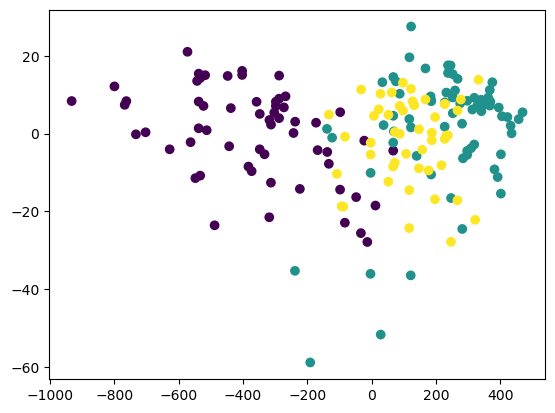

In [5]:
### BEGIN SOLUTION
Y = pc_transform(X_wine,2)
### END SOLUTION
plt.scatter(Y[0,:], Y[1,:], c=L_wine);

We will now try to improve the result by normalisation.<br>
The idea is that we take each row of **X_wine**, and standartise it to have mean 0 and variance 1.<br>

**<font color='blue'>Q:</font>** Why might we want to do that? (HINT: take a look at the columns printed above).<br><br>
You man use the class **StandardScaler** from **sklearn.preprocessing** to do so (already imported). <br>
Place the standartised version of **X_wine** in a matrix called **<font color='red'>XS</font>**. Then compute the first 2 principal componets for **XS**, and place the result into **<font color='red'>YS</font>**. <br>
**NOTE:** Make sure you are normalising the **rows** and not the **columns**

**<font color='blue'>Q:</font>** Is this a better representation for the data?

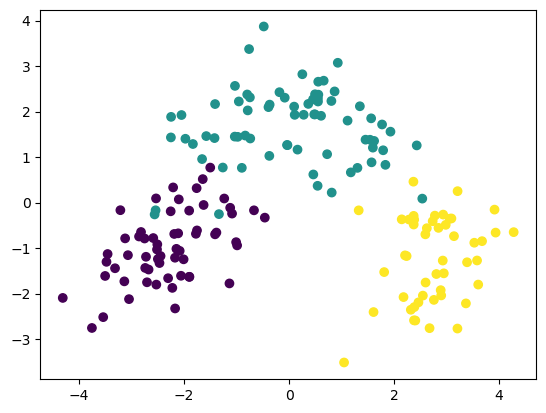

In [6]:
### BEGIN SOLUTION

scaler = StandardScaler()
scaler.fit(X_wine.T)
XS = scaler.transform(X_wine.T)
XS = XS.T
YS = pc_transform(XS, 2)

### END SOLUTION

plt.scatter(YS[0,:], YS[1,:], c=L_wine);

# YS = pc_transform(XS, [0])
# plt.figure()
# plt.scatter(YS[0,:], np.zeros(YS.shape), c=L_wine);

